In [36]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [37]:
def f(t, gamma, x):
    return -gamma * x
 
def f_accurate(t, gamma, x0):
    return x0 * np.exp(-gamma * t)
 
def Runge_Kutta_method(h, t0, T, x0, gamma):
    t = t0
    x = x0
    time = [t]
    res = [x]
    while (t < T):
        k1 = h * f(t, gamma, x)
        k2 = h * f(t + h / 2, gamma, x + k1 / 2)
        k3 = h * f(t + h / 2, gamma, x + k2 / 2)
        k4 = h * f(t + h, gamma, x + k3)
        x = x + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = t + h
 
        res.append(x)
        time.append(t)
 
    return np.array(res), np.array(time)
 
def Bernoulli(h, t0, T, x0, gamma):
    t = t0
    time = [t]
    x = x0
    res = [x]
    while (t < T):
        r = np.random.uniform(0, 1)
        if (r < gamma * x * h):
            x = x - 1
        t = t + h
        time.append(t)
        res.append(x)
 
    return np.array(res), np.array(time)
 
def Gillespie(t0, T, x0, gamma):
    t = t0
    time = [t]
    x = x0
    res = [x]
    while (t < T):
        r = np.random.uniform(0, 1)
        tau = 1 / gamma * x * np.log(1 / r)
        x = x - 1
        t = t + tau
        res.append(x)
        time.append(t)
 
    return np.array(res), np.array(time)
 

In [39]:
 
t0 = 0
T = 1000
h = 0.01
x0 = 10000
gamma = 0.001
 
res_methods = []
times = []
 
res_rk, time_rk = Runge_Kutta_method(h, t0, T, x0, gamma)
res_methods.append(res_rk)
times.append(time_rk)
 
start_time = time.time()
res_b, time_b = Bernoulli(h, t0, T, x0, gamma)
exe_time_b = time.time() - start_time
res_methods.append(res_b)
times.append(time_b)

start_time = time.time()
res_g, time_g = Gillespie(t0, T, x0, gamma)
exe_time_g = time.time() - start_time
res_methods.append(res_g)
times.append(time_g)

print('Время выполнения метода Бернулли = ' + str(exe_time_b))
print('Время выполнения метода Гиллеспи = ' + str(exe_time_g))
plt.figure(figsize=(10, 10))
plt.plot(times[0], 0.5 * np.log(res_methods[0]), 'y', label = 'Runge_Kutta')
plt.plot(times[1], 0.5 * np.log(res_methods[1]), 'b', label = 'Bernoulli')
plt.plot(times[2], 0.5 * np.log(res_methods[2]), 'b', label = 'Gillespie')
plt.xlabel('t')
plt.ylabel('log(x)')
plt.title('Сравнение методов')
plt.grid(True)
plt.legend()
plt.show()


UnboundLocalError: cannot access local variable 'x' where it is not associated with a value

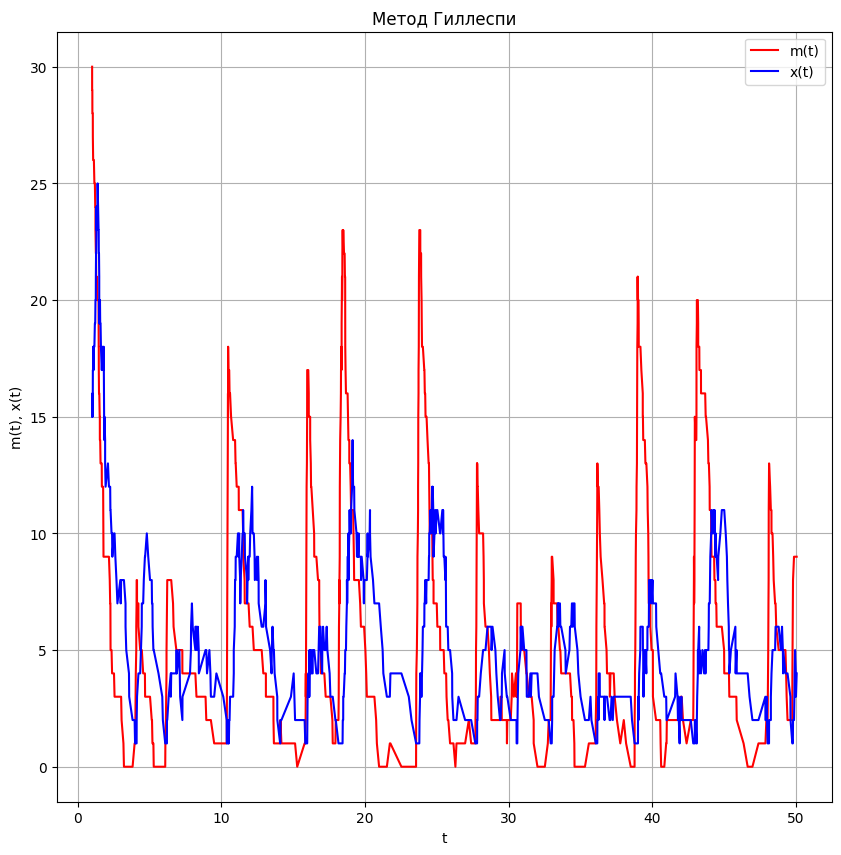

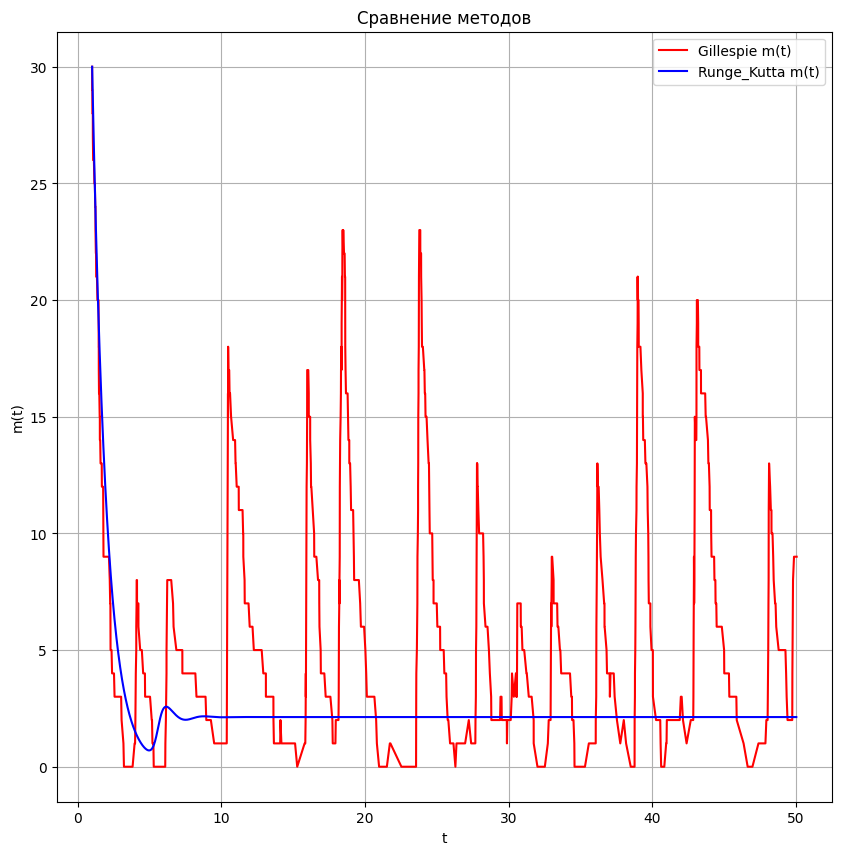

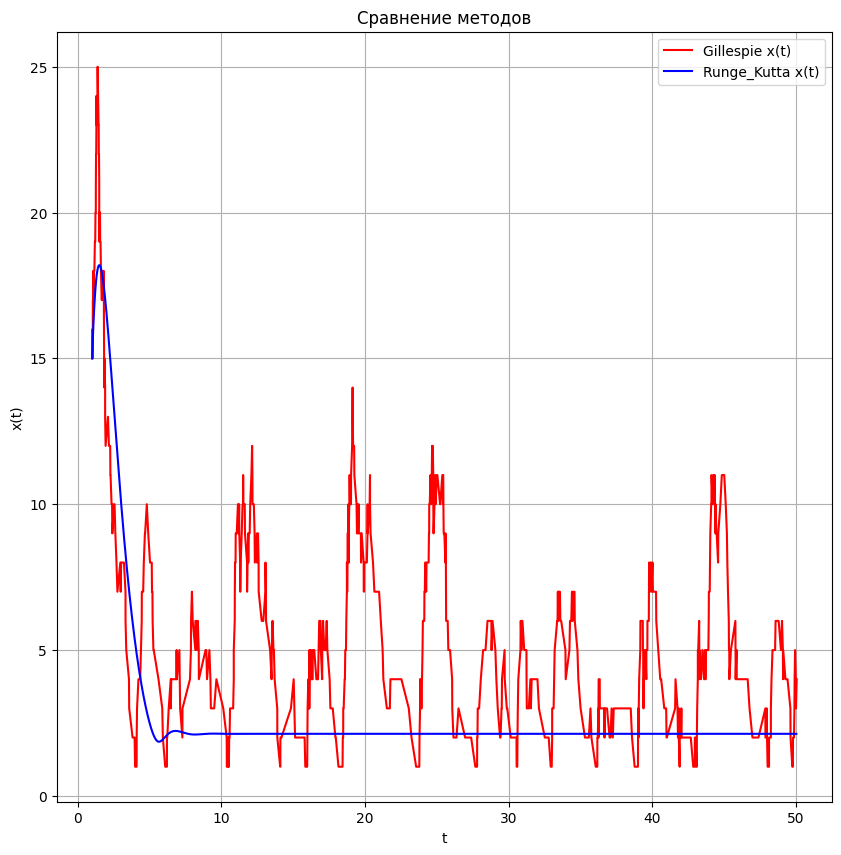

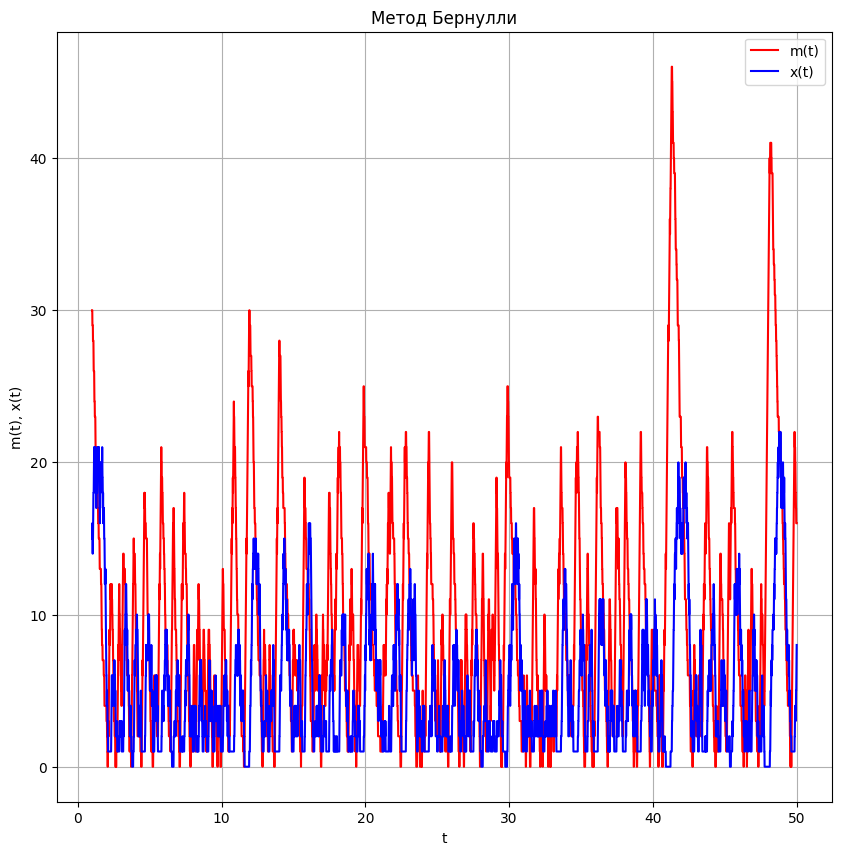

In [ ]:
t0 = 1
T = 50
h = 0.01
x0 = 15
m0 = 30
n = 6
alpha = 200
beta = 1
gamma = 1
c = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
 
res_methods_2 = []
times_2 = []
 
res_gi, time_gi = Gillespie_2(t0, T, m0, x0, n, alpha, beta, gamma, c)
res_methods_2.append(res_gi)
times_2.append(time_gi)

res_be, time_be = Bernoulli_2(h, t0, T, m0, x0, n, alpha, beta, gamma, c)
res_methods_2.append(res_be)
times_2.append(time_be)
 
res_rk_2, time_rk_2 = Runge_Kutta_method_2(h, t0, T, [m0, x0], n, alpha, beta, gamma)
res_methods_2.append(res_rk_2)
times_2.append(time_rk_2)
 
plt.figure(figsize=(10, 10))
plt.plot(times_2[0], res_methods_2[0][:, 0], 'r', label = 'm(t)')
plt.plot(times_2[0], res_methods_2[0][:, 1], 'b', label = 'x(t)')
plt.xlabel('t')
plt.ylabel('m(t), x(t)')
plt.title('Метод Гиллеспи')
plt.grid(True)
plt.legend()
plt.show()
 
plt.figure(figsize=(10, 10))
plt.plot(times_2[0], res_methods_2[0][:, 0], 'r', label = 'Gillespie m(t)')
plt.plot(times_2[2], res_methods_2[2][:, 0], 'b', label = 'Runge_Kutta m(t)')
plt.xlabel('t')
plt.ylabel('m(t)')
plt.title('Сравнение методов')
plt.grid(True)
plt.legend()
plt.show()
 
plt.figure(figsize=(10, 10))
plt.plot(times_2[0], res_methods_2[0][:, 1], 'r', label = 'Gillespie x(t)')
plt.plot(times_2[2], res_methods_2[2][:, 1], 'b', label = 'Runge_Kutta x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Сравнение методов')
plt.grid(True)
plt.legend()
plt.show()
 
plt.figure(figsize=(10, 10))
plt.plot(times_2[1], res_methods_2[1][:, 0], 'r', label = 'm(t)')
plt.plot(times_2[1], res_methods_2[1][:, 1], 'b', label = 'x(t)')
plt.xlabel('t')
plt.ylabel('m(t), x(t)')
plt.title('Метод Бернулли')
plt.grid(True)
plt.legend()
plt.show()

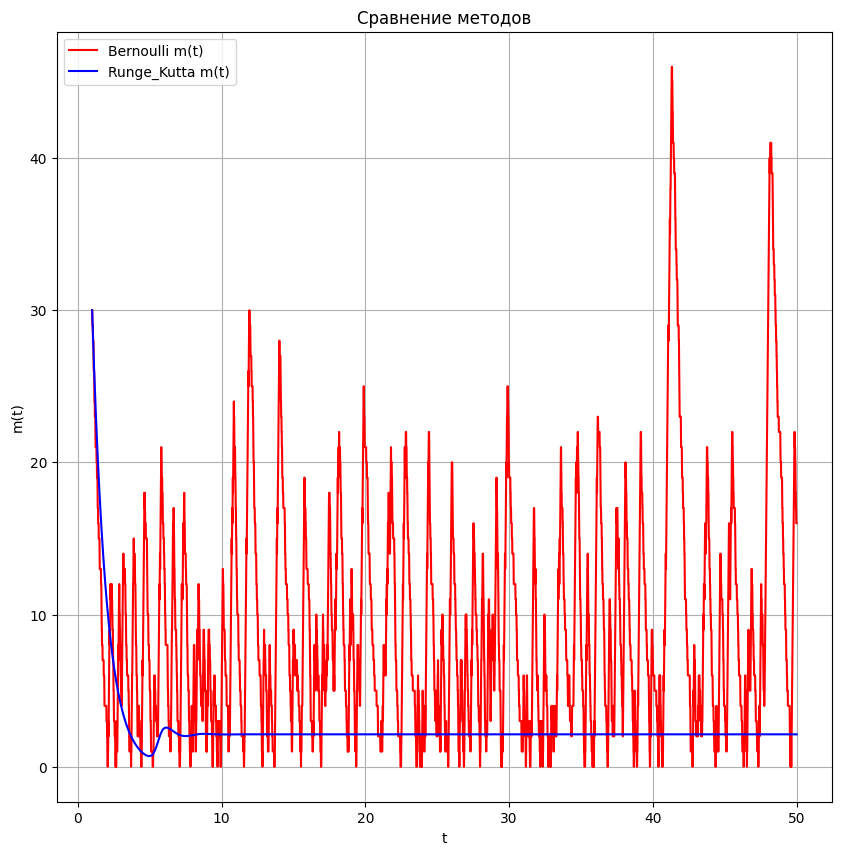

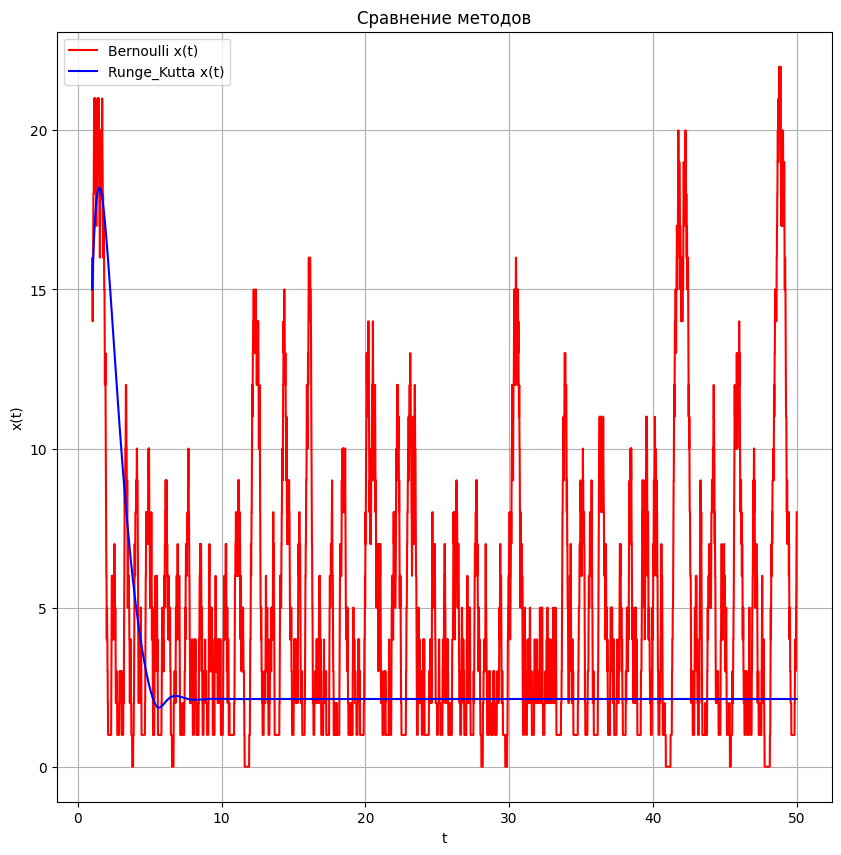

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(times_2[1], res_methods_2[1][:, 0], 'r', label = 'Bernoulli m(t)')
plt.plot(times_2[2], res_methods_2[2][:, 0], 'b', label = 'Runge_Kutta m(t)')
plt.xlabel('t')
plt.ylabel('m(t)')
plt.title('Сравнение методов')
plt.grid(True)
plt.legend()
plt.show()
 
plt.figure(figsize=(10, 10))
plt.plot(times_2[1], res_methods_2[1][:, 1], 'r', label = 'Bernoulli x(t)')
plt.plot(times_2[2], res_methods_2[2][:, 1], 'b', label = 'Runge_Kutta x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Сравнение методов')
plt.grid(True)
plt.legend()
plt.show()